# **Recurrent Neural Networks**

In this lab, you will implement a simple **Recurrent Neural Network (RNN)** using **PyTorch** to predict daily temperatures based on previous observations.

As is practice in this course, `XXXX` means you have to fill in the correct code. If you are following along and not in our course at the University of Rhode Island, you can find the answers in the `03-recurrent-neural-networks-ANSWERKEY.ipynb` file in the repository.

**What You Will Learn:**
- How to prepare time series data for an RNN
- How to define and train an RNN model in PyTorch
- How to visualize predictions and evaluate performance


## **Step 1: Install and Import Required Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import Dataset, DataLoader, random_split

# Set random seed for reproducibility
torch.manual_seed(24)
np.random.seed(24)

## **Step 2: Generate Synthetic Temperature Data**

For simplicity, we generate a synthetic dataset of daily temperatures with an **increasing trend**.

In [ ]:
# Generate a simple temperature dataset
np.random.seed(24)
days = 100  # total number of days we want
raw_temperatures = 15 + 0.1 * np.arange(days) + np.random.normal(0, 0.5, days)  # trend + noise

# Normalize data
min_temp, max_temp = XXXX, XXXX
normalized_temperatures = (XXXX - XXXX) / (XXXX - XXXX)

# Convert to PyTorch tensor (hint: PyTorch layers expect `float32`)
temperatures = XXXX

Let's visualize the data:

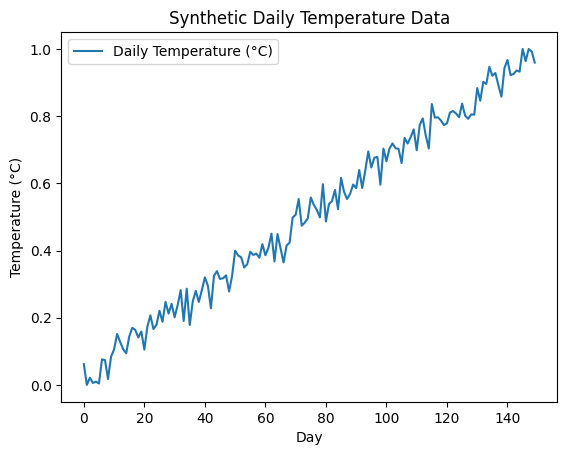

In [ ]:
plt.plot(temperatures.numpy(), label='Daily Temperature (°C)')
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.title("Synthetic Daily Temperature Data")
plt.legend()
plt.show()

## **Step 3: Create Custom Dataset for an RNN**

We will use a **sliding window** approach, where we take the previous `seq_length` days as input to predict the next day.

The sliding window method creates training samples where each input sequence has a fixed number of past observations, and the target is the next value.

In [ ]:
# Define custom dataset class
class TemperatureDataset(Dataset):
    def __init__(self, data, seq_length):
        """
        Custom PyTorch Dataset for temperature time series.

        Args:
        - data (torch.Tensor): Normalized temperature data.
        - seq_length (int): Number of time steps in each input sequence.
        """
        self.seq_length = XXXX
        self.X, self.y = self.XXXX(XXXX)

    def create_sequences(self, data):
        """
        Create input-output sequences for training.

        Args:
        - data (torch.Tensor): Normalized temperature data.

        Returns:
        - X (torch.Tensor): Sequence inputs of shape (num_samples, seq_length).
        - y (torch.Tensor): Corresponding targets.
        """
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            X.append(XXXX)  # Take `seq_length` values as input
            y.append(XXXX)  # The next value as target
        return torch.stack(X), torch.stack(y)

    def XXXX(self):
        return len(self.X)

    def XXXX(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
# Define dataset parameters
seq_length = 3
train_ratio = 0.8  # 80% training, 20% testing
batch_size = 16

# Create full dataset
dataset = TemperatureDataset(temperatures, seq_length)

Split into **training and testing sets** without using `sklearn`!

Remember that with `sklearn` we could do:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
```


In [ ]:
# Split into train and test sets
train_size = int(XXXX * XXXX)
test_size = XXXX - XXXX
train_dataset, test_dataset = random_split(XXXX, [XXXX, XXXX])

# Create DataLoaders for training and testing
train_loader = XXXX
test_loader = XXXX

# Print dataset sizes
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Total samples: 97
Training samples: 77
Testing samples: 20


## **Step 4: Define the RNN Model**

A simple RNN with **one hidden layer** and **a fully connected output layer**.

**Note**: Since RNNs expect input shaped as `(batch_size, sequence_length, input_size)`, the `unsqueeze()` line ensures that x has an additional last dimension for `input_size` (i.e., 1).

In [ ]:
class TemperatureRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, output_size=1):
        super(TemperatureRNN, self).__init__()  # inheret from Module class
        self.hidden_size = hidden_size  # number of units in each hidden state
        self.rnn = XXXX  # batch_first ensures that input tensors are (batch_size, seq_length, input_size)
        self.fc = XXXX  # maps hidden state to final output

    def forward(self, x):
        x = x.unsqueeze(-1)  # add feature dimension (1)
        h0 = XXXX  # initial hidden state
        out, _ = XXXX  # passes input and initial hidden state to the network
        # out = [batch_size, seq_length, hidden_size]
        out = XXXX  # get last prediction
        out = XXXX  # feed to fully connected layer
        return out

## **Step 5: Train the Model**

Define loss function and optimizer:

In [ ]:
model = XXXX
criterion = XXXX  # HINT: we are dealing with a regression problem
optimizer = optim.Adam(XXXX, XXXX)

Train the model:

In [ ]:
# Train the model
num_epochs = 25
for epoch in XXXX:
    XXXX
    total_loss = 0
    for XXXX, XXXX in XXXX:
        XXXX
        XXXX
        loss = XXXX
        XXXX
        XXXX
        total_loss += loss.item()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}')

Epoch 5/25, Loss: 0.0483
Epoch 10/25, Loss: 0.0083
Epoch 15/25, Loss: 0.0078
Epoch 20/25, Loss: 0.0044
Epoch 25/25, Loss: 0.0048


## **Step 6: Evaluate the Model**

Predict the test set:

In [ ]:
# Evaluate the model
model.eval()
y_test_list, test_predictions_list = [], []

with XXXX:
    for XXXX, XXXX in XXXX:
        predictions = XXXX.squeeze()
        y_test_list.extend(y_batch.numpy())
        test_predictions_list.extend(predictions.numpy())

Compare predictions with actual values:

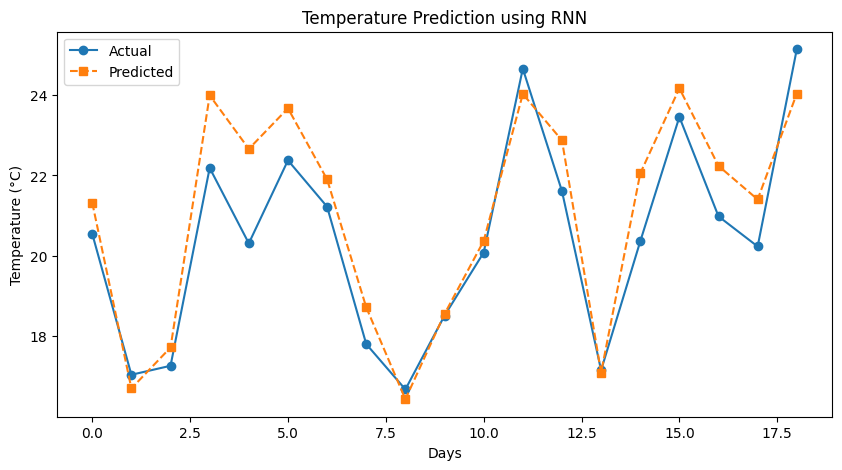

In [ ]:
# Convert lists to numpy arrays
y_test = np.array(y_test_list)  # Ground truth
test_predictions = np.array(test_predictions_list)  # Model predictions

# Rescale to original temperature scale
y_test_original = y_test * (max_temp - min_temp) + min_temp
test_predictions_original = test_predictions * (max_temp - min_temp) + min_temp

# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_original)), y_test_original, label='Actual', marker='o', linestyle='-')
plt.plot(range(len(test_predictions_original)), test_predictions_original, label='Predicted', marker='s', linestyle='--')
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Prediction using RNN")
plt.legend()
plt.show()

### Evaluation Metrics

#### **1. Root Mean Squared Error (RMSE)**

What it is:
- RMSE calculates the ***average squared error between predicted and actual values, then takes the square root***.

- It penalizes large errors more than small ones, making it sensitive to outliers.

- ***Lower RMSE*** = ***better model accuracy.***

Application to temperature prediction:
- RMSE tells you how far off your predictions are, on average, in the same unit as the data (°C).
- If RMSE = 0.3°C, your model’s typical error is about 0.3°C per day.

#### **2. Mean Absolute Error (MAE)**

What it is:
- MAE is the absolute difference between actual and predicted values.
- It treats all errors equally (unlike RMSE, which penalizes large errors more).
- ***Lower MAE = more accurate predictions.***

Application to temperature prediction:
- If MAE = 0.25°C, your model’s average prediction error is 0.25°C per day.

#### **3. R² Score (Coefficient of Determination)**

What it is:
- R² tells you how well your model explains the variance in the data.
- A value of 1.0 means a perfect fit, and 0.0 means predictions are no better than the mean.
- ***Negative values*** mean the model is ***worse than just predicting the average temperature***.

Application to temperature prediction:
- If R² = 0.85, 85% of the temperature variation is explained by the model.
- If R² = 0.2, the model is not capturing much of the trend.

#### **4. Mean Absolute Percentage Error (MAPE)**

What it is:
- MAPE is the ***percentage-based error***, showing how wrong the predictions are relative to actual values.
- ***Lower MAPE (%) = more accurate predictions.***

Application to temperature prediction:
- If MAPE = 5%, predictions are on average 5% off from the actual values.
- Good for relative comparison, but not ideal if actual values are near zero, as it causes large percentage errors.

### **Which Metric Should You Focus On?**
* **RMSE**: Best when large errors are more important.
* **MAE**: Best for understanding typical prediction error.
* **R²**: Best for evaluating overall model fit.
* **MAPE**: Best for relative percentage accuracy but beware of small values.

In [ ]:
# Compute evaluation metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse_value = rmse(XXXX, XXXX)
mae_value = mean_absolute_error(XXXX, XXXX)
r2 = r2_score(XXXX, XXXX)
mape_value = mape(XXXX, XXXX)

print(f"\nEvaluation Metrics:")
print(f"RMSE: {rmse_value:.4f}")
print(f"MAE: {mae_value:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape_value:.2f}%")



Evaluation Metrics:
RMSE: 1.0834
MAE: 0.8976
R² Score: 0.8065
MAPE: 4.29%


## **Step 7: Make a Future Prediction**

Use the last few days to predict the next day's temperature:

In [ ]:
# Predict the next temperature
last_seq = torch.tensor(normalized_temperatures[-seq_length:], dtype=torch.float32).unsqueeze(0)
next_temp = XXXX.item()
next_temp_original = next_temp * (max_temp - min_temp) + min_temp

print(f"\nPredicted temperature for the next day: {next_temp_original:.2f}°C")


Predicted temperature for the next day: 25.44°C


## **Step 8: Challenge Time!**

To make the RNN model more accurate for temperature prediction, we can address several key limitations:

- **Normalize the Data**: Standardizing or normalizing the temperature values improves training stability.
- **Increase the Sequence Length**: Capturing longer temporal dependencies improves forecasting.
- **Use a Deeper Network**: Stacking multiple layers enhances feature extraction.
- **Use a More Advanced Optimizer**: AdamW provides better weight decay regularization.
- **Tune Hyperparameters**: Increase the number of hidden units, adjust learning rate, and add dropout.

Try to implement each of these changes. Which one improves the model the most?